# Examining Data (Thyroid Dataset)

This uses the UCI Machine learning dataset on Thyroid disease found here https://archive.ics.uci.edu/ml/datasets/thyroid+disease. The files to be used are as follows:

* `ann-train.data`: Source for training data
* `ann-test.data`: Source for testing the data against a model
* `ann-Readme`: Narrative for the dataset
* `ann-thyroid.names`: Meta information on the dataset

## Objectives

* Read the data as a raw file using Pandas library
* Examine missing values
* Examine attributes and its distribution
* Create an output which is the cleaned up file for use later on

## Narrative

*(Taken from Readme)* The problem is to determine whether a patient referred to the clinic is
hypothyroid. Therefore three classes are built: normal (not hypothyroid),
hyperfunction and subnormal functioning. Because 92 percent of the patients
are not hyperthyroid a good classifier must be significant better than 92%.

### Data Attributes

The file seems to already be normalized so no normalization transformation is required. However, according to specs, we need indicate and use the following **21** attributes (dimensionality of 21) partaining to the following:

* **x0**
* **x2**
* **x3**
* **x4**
* **x5**
* **x6**
* **x7**
* **x8**
* **x9**
* **x10**
* **x11**
* **x12**
* **x13**
* **x14**
* **x15**
* **x16**
* **x17**
* **x18**
* **x19**
* **x20**
* **x21**

We'd like to represent therefore our dataset `X` as a set / list / array of datapoints where:

$X_i = { x_0 ... x_{20} }$

### Data Labels

The last column partains to the classification with one of three possible values:

* **1**: Hyperfunction (abnormal state)
* **2**: Subnormal
* **3**: Normal

In [1]:
# Import the libraries
import pandas as pd
import numpy as np
from scipy.stats import iqr
from matplotlib import pyplot

## Reading a CSV file using Pandas

In this section we store the data as is using the variables `df_train` and `df_test`. The `read_csv()` function from pandas will take in a CSV file and convert it to a dataframe for examination later on. Some things to consider when calling this function against the `ann-train.data` file:

1. The file is space delimited file and not a comma delimited file. Therefore, we have to explicitly define an extra parameter in the `read_csv` function called `delimiter` whose value is a space to indicate the delimiter to be used when parasing the file.
2. There are no headers in the file *(first row is the first data entity / data point of the dataset)*. By default, `read_csv` will use the first row as the column names. We can specify `header=None` as a parameter to the function so the default columns will be from `0` to `n-1` where `n` is the length of the columns of a dataframe.

**Documentation:** https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

In [2]:
# Variables to specify the path of the files (currently in the current directory)
csv_file_train = "./ann-train.data"
csv_file_test = "./ann-test.data"

# Store the training and test data
df_train = pd.read_csv(csv_file_train, header=None, delimiter=' ')
df_test = pd.read_csv(csv_file_test, header=None, delimiter=' ')

## Displaying Initial Data

We can examine the data frame by calling the `head(n)` method of the dataframe object or `tail(n)` method. The `head` method displays first `n` number of rows whereas the `tail` method displays the last `n` number of rows.

In [3]:
n = 5

df_train.head(n)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.73,0,1,0,0,0,0,0,1,0,...,0,0,0.00060,0.015,0.120,0.082,0.146,3,NaN,NaN
1,0.24,0,0,0,0,0,0,0,0,0,...,0,0,0.00025,0.030,0.143,0.133,0.108,3,NaN,NaN
2,0.47,0,0,0,0,0,0,0,0,0,...,0,0,0.00190,0.024,0.102,0.131,0.078,3,NaN,NaN
3,0.64,1,0,0,0,0,0,0,0,0,...,0,0,0.00090,0.017,0.077,0.090,0.085,3,NaN,NaN
4,0.23,0,0,0,0,0,0,0,0,0,...,0,0,0.00025,0.026,0.139,0.090,0.153,3,NaN,NaN


## Cleaning Up Invalid Parsing

There should be only 21 columns for the data attributes and 1 column for the actual label (classification) according to the dataset. However `head` shows that there are 24 columns in total with attributes **22** and **23** having `NaN` *(not a number)* values. 

Upon examining the raw file `ann-train.data` each row actually has trailing spaces so when `read_csv` was invoked, it treated the spaces as columns. An initial cleanup would be to simply remove attributes **22** and **23**.

We can drop columns using the `drop()` function of a given data frame. The function accepts a parameter `columns` whose value is an array of columns we'd like to drop. Take note that by default, it won't change the original data frame so we need the result of `drop()` to be passed to another variable. We could recycle the `df_train` and `df_test` respectively and ust re-assign the results of the method. We'll also need to pass an `axis` parameter

**Documentation:** https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

In [4]:
# Fix df_train
df_train = df_train.drop(columns=[22, 23], axis=1)

# Fix df_test
df_test = df_test.drop(columns=[22, 23], axis=1)

# Check the result
df_train.head(n)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.73,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0.00060,0.015,0.120,0.082,0.146,3
1,0.24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00025,0.030,0.143,0.133,0.108,3
2,0.47,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00190,0.024,0.102,0.131,0.078,3
3,0.64,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00090,0.017,0.077,0.090,0.085,3
4,0.23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00025,0.026,0.139,0.090,0.153,3


## Implementing Freedman Diaconis Rule

This is a simple python function that implements the Freedman Diaconis rule which returns a proposed bin width value given a range of values. In this implementation, the function accepts a single argument `vals` which is expected to be a list or array.

**Reference:** https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule

In [5]:
# Method returns the bin width for the histogram of a range of values
def freedman_diaconis(vals):
    return 2 * (iqr(vals) / (len(vals) ** (1./3)))

## Histogram for a Single Attribute

We can then build a histogram (frequency count bar graph) using Pandas' `hist` function which uses `matplotlib` behind the scenes. For this example, we'll be using the first column of the data frame in the train set (`df_train`).

1. First we get the length of a bin using the variable `bin_width`to store the result of the function call of `freedman_diaconis()`. Take note that we are passing the raw `.values` of the column `0` and not the 
2. We then calculate the number of bins by getting the max value of all values in the first column and adding an offset with the same `bin_width` before dividing it with `bin_width`. This is stored in the variable `num_bins`.
3. Finally we can display the histogram by calling the `hist` function from the data frame with only column `0` filtered and passing `num_bins` to the argument `bins`.

Bin Width: 0.03982915825207569
Number of Bins: 24


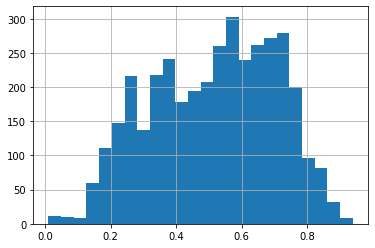

In [6]:
bin_width = freedman_diaconis(df_train[0].values)
print("Bin Width: {}".format(bin_width))

num_bins = int((np.amax(df_train[0].values) + bin_width) / bin_width)
print("Number of Bins: {}".format(num_bins))

hist = df_train[0].hist(bins=num_bins)

## Overlapping Histograms from Subsets of Data

This time around, we'll first split data according to its label found in column **21**. Since the label can have only one of three values we can use that as a condition (something that returns `true` or `false`) in the `[]` of our data frame `df_train` to filter the data. We then store the result in the variables `df_hyperfunction` for all `1` values, `df_subnormal` for all `2` values and `df_normal` for all `3` values.

The `bins` variable will then be used to store the range of bin values for the histogram as created by the `linspace()` function of numpy which accepts 3 arguments:

1. The minimum value
2. The maximum value (which we use the same offset of max of column 0 plus `bin_width`)
3. The number of bins expected

To create overlapping histograms, we use the `pyplot` (from the library `matplotlib`) object's `hist` function and call it 3 times; one for each of the sub data frames. The `hist` function of `pyplot` accepts the following:

1. The array of values (in this case column 0 values of a given data frame)
2. The bins configuration
3. Optionally an `alpha` parameter indicating how transparent the color will be
4. Optionally a `legend` parameter for the legend name

We can then setup the legend by calling `legend` function and passing its location using the `loc` parameter.

Finally we can call the `show()` function to display the histogram.

**Documentation:** https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

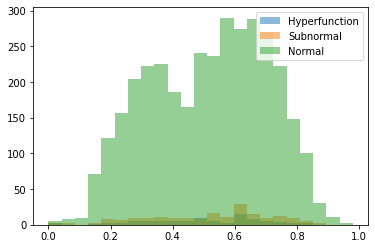

In [7]:
df_hyperfunction = df_train[df_train[21] == 1]
df_subnormal = df_train[df_train[21] == 2]
df_normal = df_train[df_train[21] == 3]

bins = np.linspace(0, np.amax(df_train[0]) + bin_width, num_bins)

pyplot.hist(df_hyperfunction[0].values, bins, alpha=0.5, label='Hyperfunction')
pyplot.hist(df_subnormal[0].values, bins, alpha=0.5, label='Subnormal')
pyplot.hist(df_normal[0].values, bins, alpha=0.5, label='Normal')
pyplot.legend(loc='upper right')

pyplot.show()

## Saving Data as New CSV

Finally, we can save a new version of the data with our desired format. We first change the columns by creating a dictionary with a new mapping of column names. This is stored in the `columns` variable.

We can then call the `rename()` function of a data frame and pass it the new columns by using the `columns` parameter. Make sure to store the result in a new variable. In this case, we re-assigned it to the variables `df_train` and `df_test`.

Finally we save the data frame to a csv file by calling its `to_csv()` function that accepts the name of the csv file to save as the first parameter and `index` parameter set to `False` so as not to include row indices in the saved CSV file.

In [8]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html
columns = {
    0: "x0",
    1: "x1",
    2: "x2",
    3: "x4",
    4: "x5",
    5: "x6",
    6: "x7",
    7: "x8",
    8: "x9",
    9: "x10",
    10: "x11",
    11: "x12",
    12: "x13",
    13: "x14",
    14: "x15",
    15: "x16",
    16: "x17",
    17: "x18",
    18: "x19",
    19: "x20",
    20: "x21",
    21: "y"
}

df_train = df_train.rename(columns=columns)
df_test = df_test.rename(columns=columns)

# Save to new csv files
df_train.to_csv("thyroid_train.csv", index=False)
df_test.to_csv("thyroid_test.csv", index=False)

# Examine the newly set columns
df_train.head(n)

,x0,x1,x2,x4,x5,x6,x7,x8,x9,x10,...,x13,x14,x15,x16,x17,x18,x19,x20,x21,y
0,0.73,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0.00060,0.015,0.120,0.082,0.146,3
1,0.24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00025,0.030,0.143,0.133,0.108,3
2,0.47,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00190,0.024,0.102,0.131,0.078,3
3,0.64,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00090,0.017,0.077,0.090,0.085,3
4,0.23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00025,0.026,0.139,0.090,0.153,3
